In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

</font> <img src="Banner2.png" width="900" height="250" align="center"/>

</font> <img src="TeamC.png" width="800" height=500 align="center"/>

# <font color=li_blue> Table of contents </font>

# <font color=purple> Sections </font>

* [1.Business Problem](#1)
* [2.Libaries used](#2)
* [3. Setup](#3)
  * [3.1 Start MariaDB](#3.1)
  * [3.2 Start Hadoop](#3.2)  
  * [3.3 Search for Spark Installation](#3.3)
  * [3.4 Create SparkSession](#3.4)
  * [3.5 Data Preparation](#3.5)
      * [3.5.1 Raw DataFrame](#3.5.1)
      * [3.5.2 DataFrame Vertices](#3.5.2)
      * [3.5.3 Countries Dataframe Vertices](#3.5.3)
      * [3.5.4 Countries Flows Dataframe](#3.5.4)
          * [3.5.4.1 Detailed Graph](#3.5.4.1)
      * [3.5.5 Country Aggregated Graph](#3.5.5)

In [172]:
import csv
import pandas as pd
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap,stat_summary,theme_bw
from plotnine import ggplot, aes, geom_bar, coord_flip,labs
from plotnine import *
import numpy as np
import pandas as pd
import plotnine
from plotnine import *
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import math

In [173]:
df = pd.read_csv('madrid_transactions_country.csv', delimiter=';', skiprows=0, low_memory=False)
#df = pd.read_csv('madrid_transactions2.csv')
#df = pd.read_csv('madrid_transactions2.csv', encoding='utf-8',delimiter=',',lineterminator='\n',low_memory=False,skiprows=0)

#df = pd.read_excel('madrid_transactions_country.xls')

In [174]:
df.columns

Index(['Unnamed: 0', 'amount', 'category', 'customer_country', 'daytime',
       'hour', 'tx_date_proc', 'weekday', 'Date_new ', 'numericcode',
       'latitude(average)', 'longitude(average)', 'country_name', 'alpha-3',
       'country_code', 'iso_3166-2', 'region', 'sub_region', 'GDP_USD_2012',
       'GDP per capita (constant 2015 US$)',
       'GDP, PPP (current international $)', 'GDP growth (annual %) ',
       'Income_classification', 'PPP_2012',
       'Gross domestic income (constant LCU)',
       'Adjusted net national income per capita (constant 2015 US$)',
       'GNI per capita, PPP (current international $)'],
      dtype='object')

In [175]:
df.head()

Unnamed: 0  amount            category customer_country    daytime  hour  \
0           1   33.46     Fashion & Shoes               GB      Night    21   
1           2   59.97     Fashion & Shoes               GB  Afternoon    16   
2           3   49.99     Fashion & Shoes               CN    Evening    17   
3           4    5.95     Fashion & Shoes               GB    Evening    17   
4           5   16.65  Bars & restaurants               DK      Night    22   

             tx_date_proc    weekday       Date_new  numericcode  ...  \
0  2012-03-01 21:51:54+00  thursday   01.03.12 21:51         826  ...   
1  2012-03-02 16:12:52+00  friday     02.03.12 16:12         826  ...   
2  2012-03-02 17:34:01+00  friday     02.03.12 17:34         156  ...   
3  2012-03-01 17:43:29+00  thursday   01.03.12 17:43         826  ...   
4  2012-03-01 22:47:52+00  thursday   01.03.12 22:47         208  ...   

        sub_region   GDP_USD_2012 GDP per capita (constant 2015 US$)  \
0  Northern Europe  2719158341006                              43100   
1  Northern Europe  2719158341006                              43100   
2     Eastern Asia  8532229986994                               6592   
3  Northern Europe  2719158341006                              43100   
4  Northern Europe   327148943812                              51567   

  GDP, PPP (current international $)  GDP growth (annual %)   \
0                       2.453352e+12                1.469888   
1                       2.453352e+12                1.469888   
2                       1.512454e+13                7.863736   
3                       2.453352e+12                1.469888   
4                       2.505246e+11                0.226500   

  Income_classification PPP_2012 Gross domestic income (constant LCU)  \
0           High income     0.70                        1769649482466   
1           High income     0.70                        1769649482466   
2  Upper middle income      3.56                                   ..   
3           High income     0.70                        1769649482466   
4           High income     7.56                        1909813185266   

   Adjusted net national income per capita (constant 2015 US$)  \
0                                              35265             
1                                              35265             
2                                               4997             
3                                              35265             
4                                              42430             

   GNI per capita, PPP (current international $)  
0                                          38120  
1                                          38120  
2                                          11140  
3                                          38120  
4                                          45820  

[5 rows x 27 columns]

In [176]:
df.describe()

Unnamed: 0        amount          hour  latitude(average)  \
count  10793.000000  10793.000000  10793.000000       10781.000000   
mean    5397.000000    108.735644     15.032428          36.377767   
std     3115.815062    310.303331      4.809074          23.721422   
min        1.000000      0.040000      0.000000         -41.000000   
25%     2699.000000     19.900000     12.000000          35.000000   
50%     5397.000000     39.990000     16.000000          42.500000   
75%     8095.000000     92.680000     18.000000          52.500000   
max    10793.000000  15000.000000     23.000000          65.000000   

       longitude(average)  country_code  GDP_USD_2012  \
count        10782.000000  10793.000000  1.079300e+04   
mean            -2.871369    480.415084  4.066684e+12   
std             67.542173    285.287340  5.548015e+12   
min           -172.333300      0.000000  7.605496e+08   
25%            -64.000000    250.000000  4.985236e+11   
50%              2.000000    410.000000  2.086958e+12   
75%             25.000000    818.000000  2.719158e+12   
max            174.000000    882.000000  1.625397e+13   

       GDP per capita (constant 2015 US$)  GDP, PPP (current international $)  \
count                        10793.000000                        1.070600e+04   
mean                         34111.388770                        4.411083e+12   
std                          19608.625647                        5.871824e+12   
min                            362.000000                        0.000000e+00   
25%                          12986.000000                        4.697206e+11   
50%                          36183.000000                        2.172384e+12   
75%                          48886.000000                        3.480299e+12   
max                         104488.000000                        1.625397e+13   

       GDP growth (annual %)   GNI per capita, PPP (current international $)  
count            10793.000000                                   10793.000000  
mean                 1.678976                                   35716.519040  
std                  2.622192                                   16638.373106  
min                 -7.086697                                       0.000000  
25%                  0.313135                                   20620.000000  
50%                  1.762223                                   38500.000000  
75%                  2.402531                                   46500.000000  
max                 16.665429                                  132440.000000

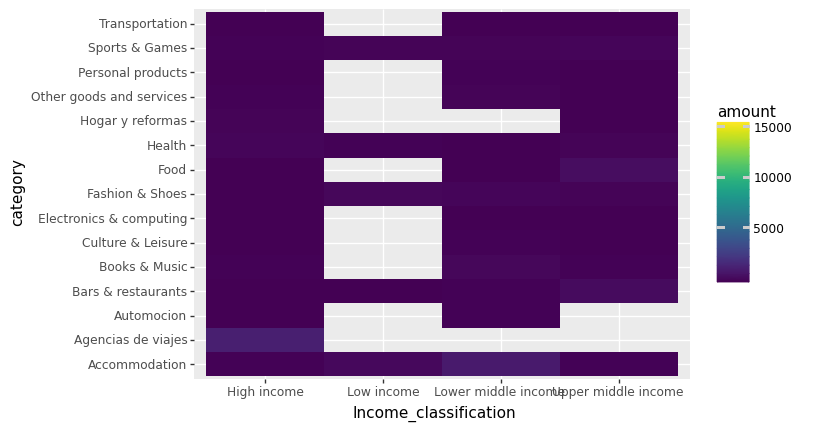

<ggplot: (8791469712442)>

In [177]:
# Heatmap 
ggplot(df, aes( "Income_classification","category", fill= "amount")) + \
geom_tile() 
#+ plotnine.theme(axis_text_x = plotnine.element_text(angle=90))

In [178]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(
                   z= df["amount"],
                   x=df['Income_classification'],
                   y=df["category"],
                   hoverongaps = False))
fig.show()

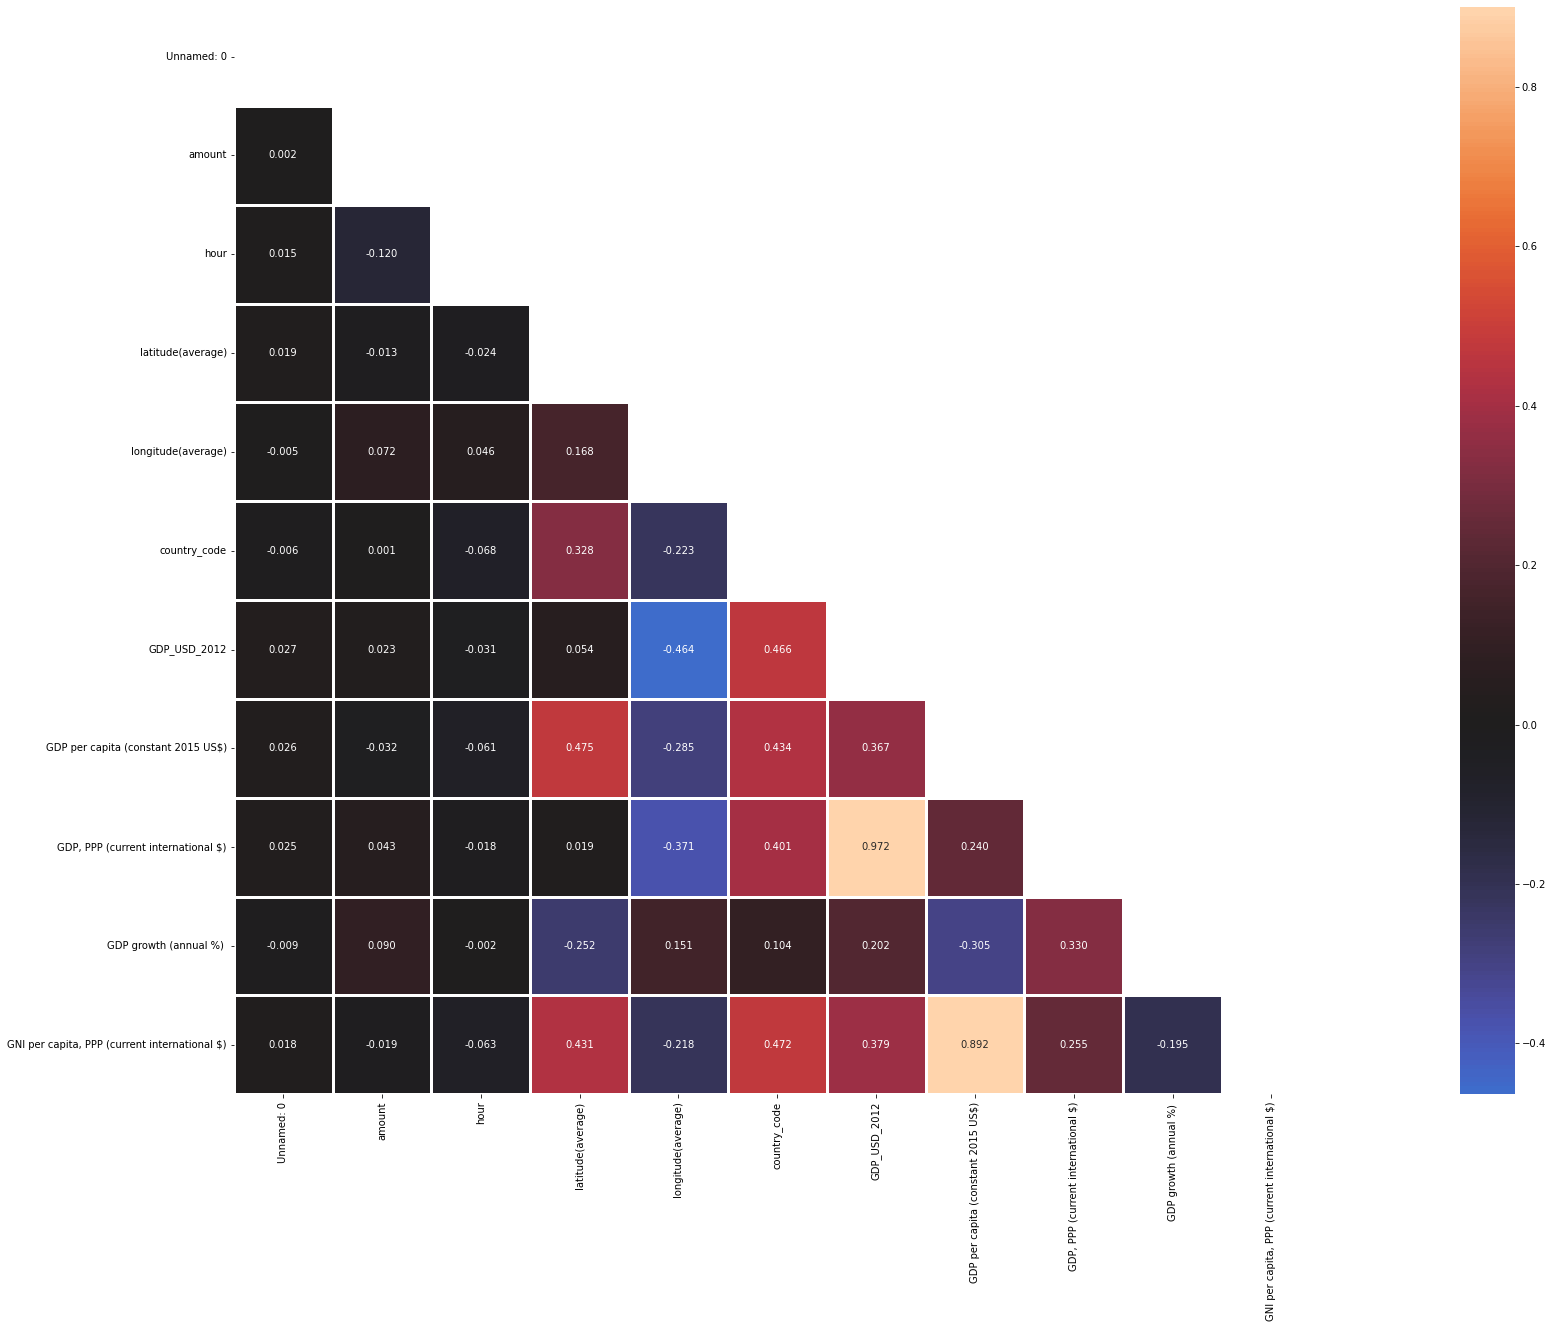

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # linear algebra
#Heatmap - Checking for autocorrelation among variables 
matrix = df.corr()
mask = np.zeros_like(matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(50,20))
heatmap = sns.heatmap(matrix, center=0, fmt=".3f", square=True, annot=True, linewidth=1.3, mask = mask,vmax=0.9);
plt.show()

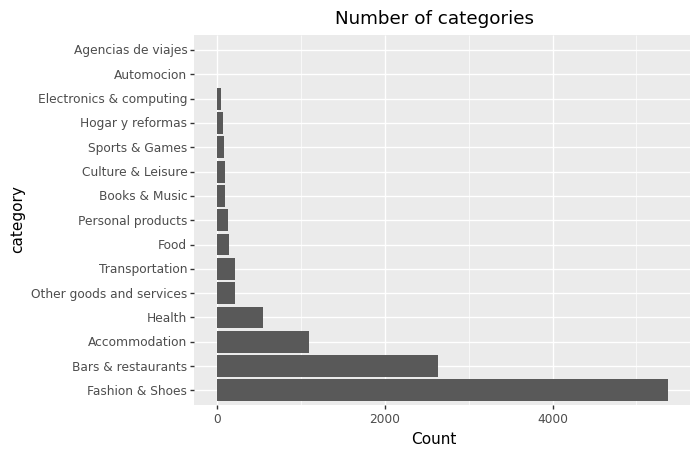

<ggplot: (8791469184994)>

In [179]:
# Determine order and create a categorical type
# Note that value_counts() is already sorted
cat_list = df['category'].value_counts().index.tolist()
df_cat = pd.Categorical(df['category'], categories=cat_list)

# assign to a new column in the DataFrame
df2 = df.assign(df_cat = df_cat)

(ggplot(df2)
 + aes(x='df_cat')
 + geom_bar(size=20)
 + coord_flip()
 + labs(y='Count', x='category', title='Number of categories')
)

In [182]:
df1 =df.groupby(['country_name', 'category','Income_classification'],as_index=False).agg(
    # Get max of the duration column for each group
    mean_amount=('amount','mean'),
    # Get min of the duration column for each group
    sum_amount=('amount', sum),
    # Get sum of the duration column for each group
    count_amount=('amount', 'count'),
    # Apply mean of growth(should give the real growth)
    growth_GDP=('GDP growth (annual %) ', 'mean'),
)

In [183]:
sales = df1.groupby(['category'])['sum_amount'].sum().reset_index()

In [184]:
sales

category  sum_amount
0              Accommodation   282511.31
1         Agencias de viajes     1516.42
2                 Automocion     1815.20
3         Bars & restaurants   201943.50
4              Books & Music    21051.47
5          Culture & Leisure    23747.28
6    Electronics & computing     2357.95
7            Fashion & Shoes   494213.51
8                       Food    13228.16
9                     Health    26579.35
10          Hogar y reformas     4709.81
11  Other goods and services    29169.34
12         Personal products     6972.28
13            Sports & Games     7919.97
14            Transportation    55848.26

In [185]:
df1 = df1.merge(sales, left_on='category', right_on ='category', how = 'left')

In [186]:
df1

country_name            category  \
0                               Algeria     Fashion & Shoes   
1                               Algeria              Health   
2                               Andorra       Accommodation   
3                               Andorra          Automocion   
4                               Andorra  Bars & restaurants   
..                                  ...                 ...   
612  Venezuela (Bolivarian Republic of)   Personal products   
613  Venezuela (Bolivarian Republic of)      Sports & Games   
614                            Viet Nam     Fashion & Shoes   
615                            Viet Nam              Health   
616                            Zimbabwe     Fashion & Shoes   

    Income_classification  mean_amount  sum_amount_x  count_amount  \
0    Upper middle income    197.095000       1182.57             6   
1    Upper middle income    216.620000        216.62             1   
2             High income   130.350000        521.40             4   
3             High income   390.120000        390.12             1   
4             High income    57.456316       2183.34            38   
..                    ...          ...           ...           ...   
612  Upper middle income      9.750000         19.50             2   
613  Upper middle income     74.000000         74.00             1   
614  Lower middle income    648.525000       1297.05             2   
615  Lower middle income    206.400000        206.40             1   
616            Low income   127.000000        127.00             1   

     growth_GDP  sum_amount_y  
0      3.400000     494213.51  
1      3.400000      26579.35  
2     -4.974444     282511.31  
3     -4.974444       1815.20  
4     -4.974444     201943.50  
..          ...           ...  
612    5.625957       6972.28  
613    5.625957       7919.97  
614    5.500000     494213.51  
615    5.500000      26579.35  
616   16.665429     494213.51  

[617 rows x 8 columns]

In [187]:
df1['market_share_ctry'] = (df1['sum_amount_x']/df1['sum_amount_y'])

In [188]:
df1

country_name            category  \
0                               Algeria     Fashion & Shoes   
1                               Algeria              Health   
2                               Andorra       Accommodation   
3                               Andorra          Automocion   
4                               Andorra  Bars & restaurants   
..                                  ...                 ...   
612  Venezuela (Bolivarian Republic of)   Personal products   
613  Venezuela (Bolivarian Republic of)      Sports & Games   
614                            Viet Nam     Fashion & Shoes   
615                            Viet Nam              Health   
616                            Zimbabwe     Fashion & Shoes   

    Income_classification  mean_amount  sum_amount_x  count_amount  \
0    Upper middle income    197.095000       1182.57             6   
1    Upper middle income    216.620000        216.62             1   
2             High income   130.350000        521.40             4   
3             High income   390.120000        390.12             1   
4             High income    57.456316       2183.34            38   
..                    ...          ...           ...           ...   
612  Upper middle income      9.750000         19.50             2   
613  Upper middle income     74.000000         74.00             1   
614  Lower middle income    648.525000       1297.05             2   
615  Lower middle income    206.400000        206.40             1   
616            Low income   127.000000        127.00             1   

     growth_GDP  sum_amount_y  market_share_ctry  
0      3.400000     494213.51           0.002393  
1      3.400000      26579.35           0.008150  
2     -4.974444     282511.31           0.001846  
3     -4.974444       1815.20           0.214918  
4     -4.974444     201943.50           0.010812  
..          ...           ...                ...  
612    5.625957       6972.28           0.002797  
613    5.625957       7919.97           0.009343  
614    5.500000     494213.51           0.002624  
615    5.500000      26579.35           0.007765  
616   16.665429     494213.51           0.000257  

[617 rows x 9 columns]

In [189]:
#df1[df1.category == ('Health')]
df1.columns

Index(['country_name', 'category', 'Income_classification', 'mean_amount',
       'sum_amount_x', 'count_amount', 'growth_GDP', 'sum_amount_y',
       'market_share_ctry'],
      dtype='object')

New column for country classification only 

In [190]:
#max market share to calculate the relative market share, metric that shows a countries position in the market compared to its main competitor.
df1['max_ms'] = df1.groupby(['category'])['market_share_ctry'].transform(max)
df1['relative_MS'] = (df1['market_share_ctry']/df1['max_ms'])

In [191]:
df1

country_name            category  \
0                               Algeria     Fashion & Shoes   
1                               Algeria              Health   
2                               Andorra       Accommodation   
3                               Andorra          Automocion   
4                               Andorra  Bars & restaurants   
..                                  ...                 ...   
612  Venezuela (Bolivarian Republic of)   Personal products   
613  Venezuela (Bolivarian Republic of)      Sports & Games   
614                            Viet Nam     Fashion & Shoes   
615                            Viet Nam              Health   
616                            Zimbabwe     Fashion & Shoes   

    Income_classification  mean_amount  sum_amount_x  count_amount  \
0    Upper middle income    197.095000       1182.57             6   
1    Upper middle income    216.620000        216.62             1   
2             High income   130.350000        521.40             4   
3             High income   390.120000        390.12             1   
4             High income    57.456316       2183.34            38   
..                    ...          ...           ...           ...   
612  Upper middle income      9.750000         19.50             2   
613  Upper middle income     74.000000         74.00             1   
614  Lower middle income    648.525000       1297.05             2   
615  Lower middle income    206.400000        206.40             1   
616            Low income   127.000000        127.00             1   

     growth_GDP  sum_amount_y  market_share_ctry    max_ms  relative_MS  
0      3.400000     494213.51           0.002393  0.122501     0.019533  
1      3.400000      26579.35           0.008150  0.131264     0.062088  
2     -4.974444     282511.31           0.001846  0.221573     0.008329  
3     -4.974444       1815.20           0.214918  0.625165     0.343779  
4     -4.974444     201943.50           0.010812  0.166685     0.064863  
..          ...           ...                ...       ...          ...  
612    5.625957       6972.28           0.002797  0.210363     0.013295  
613    5.625957       7919.97           0.009343  0.210944     0.044294  
614    5.500000     494213.51           0.002624  0.122501     0.021424  
615    5.500000      26579.35           0.007765  0.131264     0.059159  
616   16.665429     494213.51           0.000257  0.122501     0.002098  

[617 rows x 11 columns]

In [193]:
df2 = df.groupby(['country_name','Income_classification'],as_index=False).agg(
    # Get mean amount per column for each country
    mean_amount=('amount', 'mean'),
    # Get sum amount per column for each country
    sum_amount=('amount', sum),
    #  Get count amount per column for each country
    count_amount=('amount', 'count'),
    #  Get median amount per column for each country
    median_amount=('amount', 'median'),
    # Apply mean of growth since it is the same for each line by country (should give the real growth)
    growth_GDP=('GDP growth (annual %) ', 'mean'),
    # Apply mean of GDP per capita since it is the same for each line (should give the real growth)
    GDP_per_capita = ('GDP per capita (constant 2015 US$)','mean'),
)

In [194]:
df2['log_mean_amount'] = np.log(df2['mean_amount'])

In [195]:
sales = df2['sum_amount'].sum()

In [196]:
sales

1173583.8099999994

In [197]:
df2['percent'] = (df2['sum_amount'] / sales) *100
df2['log_sum_amount'] = np.log(df2['sum_amount'])
df2['log_GDP_per_capita'] = (df2['GDP_per_capita'] / sales) *100

In [198]:
df2

country_name Income_classification  mean_amount  \
0                               Algeria  Upper middle income    199.884286   
1                               Andorra           High income    66.690719   
2                                Angola  Upper middle income    353.057143   
3                             Argentina  Upper middle income     79.481717   
4                               Armenia  Lower middle income     28.000000   
..                                  ...                   ...          ...   
105                             Uruguay           High income    95.096471   
106                          Uzbekistan  Lower middle income     51.936923   
107  Venezuela (Bolivarian Republic of)  Upper middle income     63.363793   
108                            Viet Nam  Lower middle income    501.150000   
109                            Zimbabwe            Low income   127.000000   

     sum_amount  count_amount  median_amount  growth_GDP  GDP_per_capita  \
0       1399.19             7         109.90    3.400000          4012.0   
1      10203.68           153          39.95   -4.974444         33750.0   
2       2471.40             7          61.95    8.540000          3128.0   
3      23606.07           297          30.00   -1.026420         13896.0   
4         28.00             1          28.00    7.200000          3313.0   
..          ...           ...            ...         ...             ...   
105     1616.64            17          66.00    3.538179         14541.0   
106      675.18            13          40.00    7.102445          2355.0   
107     5512.65            87          42.98    5.625957         12986.0   
108     1503.45             3         221.70    5.500000          2217.0   
109      127.00             1         127.00   16.665429          1432.0   

     log_mean_amount   percent  log_sum_amount  log_GDP_per_capita  
0           5.297739  0.119224        7.243649            0.341859  
1           4.200066  0.869446        9.230504            2.875807  
2           5.866630  0.210586        7.812540            0.266534  
3           4.375527  2.011452       10.069259            1.184065  
4           3.332205  0.002386        3.332205            0.282298  
..               ...       ...             ...                 ...  
105         4.554892  0.137752        7.388105            1.239025  
106         3.950030  0.057531        6.514979            0.200667  
107         4.148893  0.469728        8.614801            1.106525  
108         6.216905  0.128108        7.315518            0.188909  
109         4.844187  0.010822        4.844187            0.122019  

[110 rows x 12 columns]

In [199]:
df2.describe()

mean_amount     sum_amount  count_amount  median_amount  growth_GDP  \
count   110.000000     110.000000    110.000000     110.000000  110.000000   
mean    129.131076   10668.943727     98.118182      65.657955    3.079526   
std      89.524965   23383.114560    227.070362      45.331982    3.737283   
min      14.900000      14.900000      1.000000      10.850000   -7.086697   
25%      70.575688     641.337500      7.000000      38.118750    0.832107   
50%     101.896907    2302.850000     21.000000      47.850000    2.819249   
75%     163.100625    9160.282500     81.000000      83.037500    5.339136   
max     501.150000  184196.770000   1686.000000     251.550000   16.665429   

       GDP_per_capita  log_mean_amount     percent  log_sum_amount  \
count      110.000000       110.000000  110.000000      110.000000   
mean     18345.500000         4.656391    0.909091        7.762112   
std      20442.886283         0.644518    1.992454        1.927679   
min        362.000000         2.701361    0.001270        2.701361   
25%       3802.000000         4.256533    0.054648        6.463499   
50%       9531.500000         4.623961    0.196224        7.739217   
75%      28553.750000         5.094365    0.780539        9.122584   
max     104488.000000         6.216905   15.695238       12.123760   

       log_GDP_per_capita  
count          110.000000  
mean             1.563203  
std              1.741920  
min              0.030846  
25%              0.323965  
50%              0.812170  
75%              2.433039  
max              8.903327

In [200]:
df2.columns

Index(['country_name', 'Income_classification', 'mean_amount', 'sum_amount',
       'count_amount', 'median_amount', 'growth_GDP', 'GDP_per_capita',
       'log_mean_amount', 'percent', 'log_sum_amount', 'log_GDP_per_capita'],
      dtype='object')

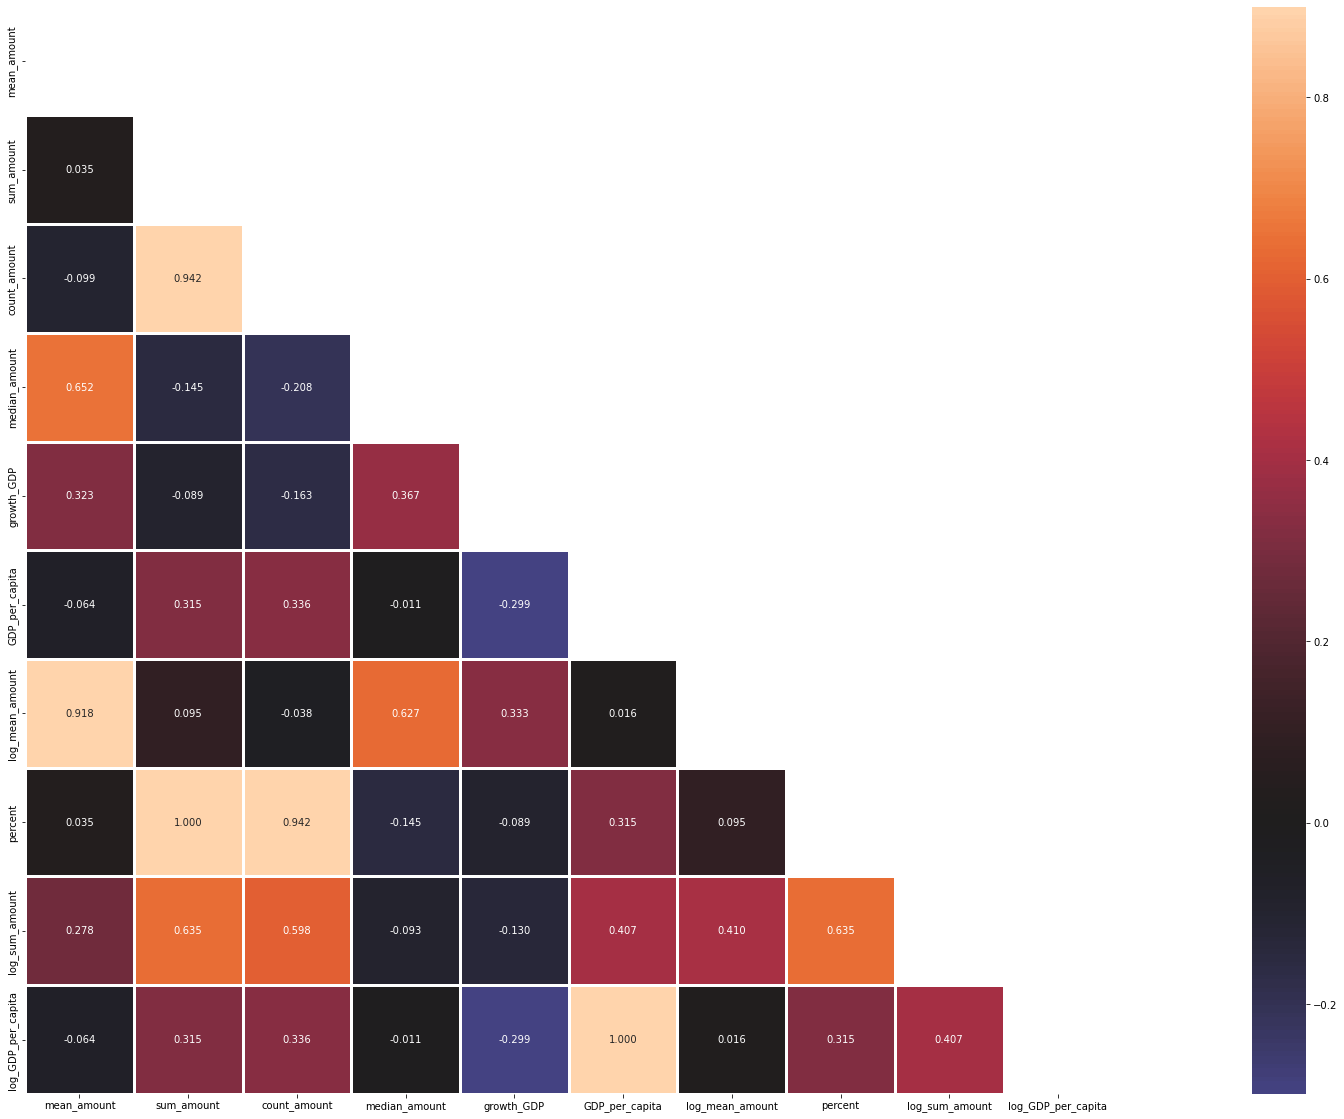

In [201]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # linear algebra
#Heatmap - Checking for autocorrelation among variables 
matrix = df2.corr()
mask = np.zeros_like(matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(50,20))
heatmap = sns.heatmap(matrix, center=0, fmt=".3f", square=True, annot=True, linewidth=1.3, mask = mask,vmax=0.9);
plt.show()

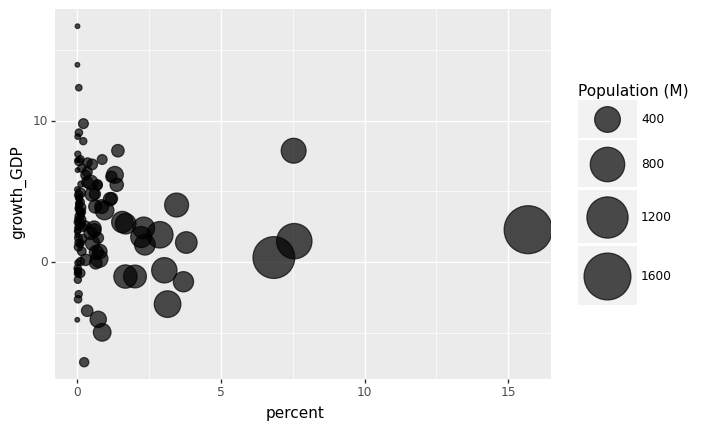

<ggplot: (8791531993284)>

In [202]:
ggplot(df2, aes(x='percent', y='growth_GDP', size ='count_amount')) + \
    geom_point(alpha=0.7) +\
    scale_size(range = (1.4, 19), name="Population (M)") 

In [203]:
data = px.scatter(df2, x="percent", y='growth_GDP',size='count_amount', color='Income_classification1 ', hover_name='country_name',
                  size_max=20)

layout = go.Layout(
    title='Growth-Share Matrix of countries Madrid transactions',
    xaxis=dict(
        title='Market Share of Purchases, 2012 [%]',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    yaxis=dict(
        title='GDP Growth, 2012 [%]',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    paper_bgcolor='rgb(0,0,0,0)',
    plot_bgcolor='rgb(0,0,0,0)',
)

fig = go.Figure(data=data, layout=layout)

fig = fig.update_layout(
    yaxis_range=[-10,10], 
    title='BCG Matrix Countries Growth vs Market Share',
    yaxis=dict(title='GDP Growth, 2012 [%]'))    
fig.update_layout(
    xaxis_range=[-0,16],
    xaxis=dict(title='Market Share of Purchases, 2012 [%]'))

fig.update_layout(template="simple_white")
fig.add_hline(y=0,line_width=2, line_dash="dash", line_color="black")
fig.add_vline(x=8, line_width=2, line_dash="dash", line_color="black")

fig.add_annotation(
    x=4
    , y=9
    , text='Question Mark'
    , yanchor='bottom'
    , showarrow=False
    , arrowhead=1
    , arrowsize=1
    , arrowwidth=2
    , arrowcolor="#636363"
    , ax=-20
    , ay=-30
    , font=dict(size=13, color="grey", family="Sans Serif")
    , align="left"
    ,)
fig.add_annotation(
    x=12
    , y=9
    , text='Stars'
    , yanchor='bottom'
    , showarrow=False
    , arrowhead=1
    , arrowsize=1
    , arrowwidth=2
    , arrowcolor="#636363"
    , ax=-20
    , ay=-30
    , font=dict(size=13, color="grey", family="Sans Serif")
    , align="left"
    ,)

fig.add_annotation(
    x=12
    , y=-9
    , text='Cash Cows'
    , yanchor='bottom'
    , showarrow=False
    , arrowhead=1
    , arrowsize=1
    , arrowwidth=2
    , arrowcolor="#636363"
    , ax=-20
    , ay=-30
    , font=dict(size=13, color="grey", family="Sans Serif")
    , align="left"
    ,)

fig.add_annotation(
    x=4
    , y=-9
    , text='Dogs'
    , yanchor='bottom'
    , showarrow=False
    , arrowhead=1
    , arrowsize=1
    , arrowwidth=2
    , arrowcolor="#636363"
    , ax=-20
    , ay=-30
    , font=dict(size=13, color="grey", family="Sans Serif")
    , align="left"
    ,)

ValueError: Value of 'color' is not the name of a column in 'data_frame'. Expected one of ['country_name', 'Income_classification', 'mean_amount', 'sum_amount', 'count_amount', 'median_amount', 'growth_GDP', 'GDP_per_capita', 'log_mean_amount', 'percent', 'log_sum_amount', 'log_GDP_per_capita'] but received: Income_classification1 

In [204]:
data = px.scatter(df2, x="log_sum_amount", y='log_GDP_per_capita',size='mean_amount',trendline="ols", hover_name='country_name',
                  size_max=20)

layout = go.Layout(
    title='Growth-Share Matrix of countries Madrid transactions',
    xaxis=dict(
        title='median_amount, 2012 ',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    yaxis=dict(
        title='GDP per Capity, 2012 [%]',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    paper_bgcolor='rgb(0,0,0,0)',
    plot_bgcolor='rgb(0,0,0,0)',
)

fig = go.Figure(data=data, layout=layout)

fig = fig.update_layout(
    yaxis_range=[-0,10], 
    title='BCG Matrix Capita vs median',
    yaxis=dict(title='log_GDP per capita, 2012 [%]'))    
fig.update_layout(
    xaxis_range=[-0,12],
    xaxis=dict(title='log_amount, 2012 [%]'))

fig.update_layout(template="simple_white")
fig.add_hline(y=60000,line_width=2, line_dash="dash", line_color="black")
fig.add_vline(x=8, line_width=2, line_dash="dash", line_color="black")

fig.add_annotation(
    x=4
    , y=9
    , text='Question Mark'
    , yanchor='bottom'
    , showarrow=False
    , arrowhead=1
    , arrowsize=1
    , arrowwidth=2
    , arrowcolor="#636363"
    , ax=-20
    , ay=-30
    , font=dict(size=13, color="grey", family="Sans Serif")
    , align="left"
    ,)
fig.add_annotation(
    x=12
    , y=9
    , text='Stars'
    , yanchor='bottom'
    , showarrow=False
    , arrowhead=1
    , arrowsize=1
    , arrowwidth=2
    , arrowcolor="#636363"
    , ax=-20
    , ay=-30
    , font=dict(size=13, color="grey", family="Sans Serif")
    , align="left"
    ,)

fig.add_annotation(
    x=12
    , y=-9
    , text='Cash Cows'
    , yanchor='bottom'
    , showarrow=False
    , arrowhead=1
    , arrowsize=1
    , arrowwidth=2
    , arrowcolor="#636363"
    , ax=-20
    , ay=-30
    , font=dict(size=13, color="grey", family="Sans Serif")
    , align="left"
    ,)

fig.add_annotation(
    x=4
    , y=-9
    , text='Dogs'
    , yanchor='bottom'
    , showarrow=False
    , arrowhead=1
    , arrowsize=1
    , arrowwidth=2
    , arrowcolor="#636363"
    , ax=-20
    , ay=-30
    , font=dict(size=13, color="grey", family="Sans Serif")
    , align="left"
    ,)

In [205]:
df1.category

0         Fashion & Shoes
1                  Health
2           Accommodation
3              Automocion
4      Bars & restaurants
              ...        
612     Personal products
613        Sports & Games
614       Fashion & Shoes
615                Health
616       Fashion & Shoes
Name: category, Length: 617, dtype: object

In [206]:
data = px.scatter(df1, x='relative_MS', y='growth_GDP', color='category',size='sum_amount_x', hover_name='country_name',
                  size_max=20)

layout = go.Layout(
    title='Growth-Share Matrix of countries Madrid transactions',
    xaxis=dict(
        title='Market Share of Purchases, 2012 [%]',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    yaxis=dict(
        title='GDP per Capity, 2012 [%]',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    paper_bgcolor='rgb(0,0,0,0)',
    plot_bgcolor='rgb(0,0,0,0)',
)

fig = go.Figure(data=data, layout=layout)

fig = fig.update_layout(
    yaxis_range=[-10,10], 
    title='BCG Matrix Countries Growth vs Market Share',
    yaxis=dict(title='GDP growth, 2012 [%]'))    
fig.update_layout(
    xaxis_range=[0,1.05],
    xaxis=dict(title='Relative MS by category, 2012 [%]'))

fig.update_layout(template="simple_white")
fig.add_hline(y=0,line_width=2, line_dash="dash", line_color="black")
fig.add_vline(x=0.5, line_width=2, line_dash="dash", line_color="black")

fig.add_annotation(
    x=0.25
    , y=9
    , text='Question Mark'
    , yanchor='bottom'
    , showarrow=False
    , arrowhead=1
    , arrowsize=1
    , arrowwidth=2
    , arrowcolor="#636363"
    , ax=-20
    , ay=-30
    , font=dict(size=13, color="grey", family="Sans Serif")
    , align="left"
    ,)
fig.add_annotation(
    x=0.75
    , y=9
    , text='Stars'
    , yanchor='bottom'
    , showarrow=False
    , arrowhead=1
    , arrowsize=1
    , arrowwidth=2
    , arrowcolor="#636363"
    , ax=-20
    , ay=-30
    , font=dict(size=13, color="grey", family="Sans Serif")
    , align="left"
    ,)

fig.add_annotation(
    x=0.75
    , y=-9
    , text='Cash Cows'
    , yanchor='bottom'
    , showarrow=False
    , arrowhead=1
    , arrowsize=1
    , arrowwidth=2
    , arrowcolor="#636363"
    , ax=-20
    , ay=-30
    , font=dict(size=13, color="grey", family="Sans Serif")
    , align="left"
    ,)

fig.add_annotation(
    x=0.25
    , y=-9
    , text='Dogs'
    , yanchor='bottom'
    , showarrow=False
    , arrowhead=1
    , arrowsize=1
    , arrowwidth=2
    , arrowcolor="#636363"
    , ax=-20
    , ay=-30
    , font=dict(size=13, color="grey", family="Sans Serif")
    , align="left"
    ,)

In [50]:
import plotly.graph_objects as go

import pandas as pd

# Load dataset
df = pd.read_csv(
    "https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv")
df.columns = [col.replace("AAPL.", "") for col in df.columns]

# Initialize figure
fig = go.Figure()

# Add Traces

fig.add_trace(
    go.Scatter(x=list(df.index),
               y=list(df.High),
               name="High",
               line=dict(color="#33CFA5")))

fig.add_trace(
    go.Scatter(x=list(df.index),
               y=[df.High.mean()] * len(df.index),
               name="High Average",
               visible=False,
               line=dict(color="#33CFA5", dash="dash")))

fig.add_trace(
    go.Scatter(x=list(df.index),
               y=list(df.Low),
               name="Low",
               line=dict(color="#F06A6A")))

fig.add_trace(
    go.Scatter(x=list(df.index),
               y=[df.Low.mean()] * len(df.index),
               name="Low Average",
               visible=False,
               line=dict(color="#F06A6A", dash="dash")))

# Add Annotations and Buttons
high_annotations = [dict(x="2016-03-01",
                         y=df.High.mean(),
                         xref="x", yref="y",
                         text="High Average:<br> %.3f" % df.High.mean(),
                         ax=0, ay=-40),
                    dict(x=df.High.idxmax(),
                         y=df.High.max(),
                         xref="x", yref="y",
                         text="High Max:<br> %.3f" % df.High.max(),
                         ax=0, ay=-40)]
low_annotations = [dict(x="2015-05-01",
                        y=df.Low.mean(),
                        xref="x", yref="y",
                        text="Low Average:<br> %.3f" % df.Low.mean(),
                        ax=0, ay=40),
                   dict(x=df.High.idxmin(),
                        y=df.Low.min(),
                        xref="x", yref="y",
                        text="Low Min:<br> %.3f" % df.Low.min(),
                        ax=0, ay=40)]

fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label="None",
                     method="update",
                     args=[{"visible": [True, False, True, False]},
                           {"title": "Yahoo",
                            "annotations": []}]),
                dict(label="High",
                     method="update",
                     args=[{"visible": [True, True, False, False]},
                           {"title": "Yahoo High",
                            "annotations": high_annotations}]),
                dict(label="Low",
                     method="update",
                     args=[{"visible": [False, False, True, True]},
                           {"title": "Yahoo Low",
                            "annotations": low_annotations}]),
                dict(label="Both",
                     method="update",
                     args=[{"visible": [True, True, True, True]},
                           {"title": "Yahoo",
                            "annotations": high_annotations + low_annotations}]),
            ]),
        )
    ])

# Set title
fig.update_layout(title_text="Yahoo")

fig.show()

In [48]:
# Add dropdown
plot.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label="Both",
                     method="update",
                     args=[{"visible": [True, True]},
                           {"title": "Both"}]),
                dict(label="Data 1",
                     method="update",
                     args=[{"visible": [True, False]},
                           {"title": "Data 1",
                            }]),
                dict(label="Data 2",
                     method="update",
                     args=[{"visible": [False, True]},
                           {"title": "Data 2",
                            }]),
            ]),
        )
    ])
  
plot.show()

NameError: name 'plot' is not defined

In [ ]:
import pandas as pd
import os
import plotly.graph_objs as go
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output


# lists of categories
options1 = sorted(df1["category"].unique().tolist())

# dictionary of category - subcategories
all_options = df1.groupby("category")["country_name"].unique()\
                .apply(list).to_dict()

# we add as first subcategory for each category `all`
for k, v in all_options.items():
    all_options[k].insert(0, 'all')


app = dash.Dash()
app.layout = html.Div([
    dcc.Dropdown(
        id='first-dropdown',
        options=[{'label': k, 'value': k} for k in all_options.keys()],
        value=options1[0]
    ),

    html.Hr(),

    dcc.Dropdown(id='second-dropdown'),

    html.Hr(),

    dcc.Graph(id='display-selected-values')
])

# the following two callbacks generate a dynamic 2 option

@app.callback(
    dash.dependencies.Output('second-dropdown', 'options'),
    [dash.dependencies.Input('first-dropdown', 'value')])
def set_2_options(first_option):
    return [{'label': i, 'value': i} for i in all_options[first_option]]


@app.callback(
    dash.dependencies.Output('second-dropdown', 'value'),
    [dash.dependencies.Input('second-dropdown', 'options')])
def set_2_value(available_options):
    return available_options[0]['value']


@app.callback(
    dash.dependencies.Output('display-selected-values', 'figure'),
    [dash.dependencies.Input('first-dropdown', 'value'),
     dash.dependencies.Input('second-dropdown', 'value')])
def update_graph(selected_first, selected_second):
    if selected_second == 'all':
        ddf = df1[df1["category"]==selected_first]
    else:
        ddf = df1[(df1["category"]==selected_first) &
                 (df1["country_name"]==selected_second)]

    fig = go.Figure()
    fig.add_trace(
        go.Scatter(x=ddf["percent"],
                   y=ddf['growth_GDP'],
                   marker = dict(size=15, color='green'),
                   mode='markers'))
    return fig
if __name__ == '__main__':
    app.run_server(debug=True, port=8050)

In [ ]:
df["category"].unique()

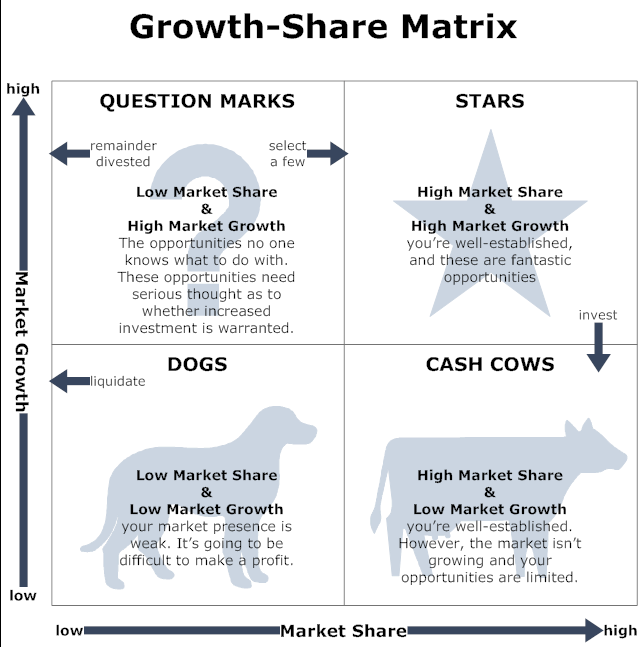

In [ ]:
#pip install chart-studio

In [ ]:
#import chart_studio.plotly as py
from chart_studio import plotly as py
import plotly.graph_objs as go

hover_text = []
color_range = []
for index, row in df2.iterrows():
    hover_text.append(('Percent: {percent}<br>'+
                      'Growth GDP: {growth_GDP}%<br>'+
                      'Count: {count_amount}<br>').format(percent=df2['percent'],
                                                                        growth_GDP=df2['growth_GDP'],
                                                                        count_amount=df2['count_amount']))
    colorscale='Income_classification'

trace0 = go.Scatter(
    x=df2['percent'],
    y=df2['growth_GDP'],
    text=hover_text,
    mode='markers',
    marker=dict(
        size=df2['count_amount'],
        color=color_range,
        showscale=True,
        reversescale=True,
        colorbar=dict(
                title='Income'
            ),
        colorscale='RdBu'
    )
)
                                                                                                    

data = [trace0]
layout = go.Layout(
    title='Growth-Share Matrix of countries Madrid transactions',
    xaxis=dict(
        title='Market Share of Purchases, 2012 [%]',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    yaxis=dict(
        title='GDP Growth, 2012 [%]',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='bcg-matrix')

In [210]:
df3 =df.groupby(['category', 'hour'],as_index=False).agg(
    # Get max of the duration column for each group
    mean_amount=('amount', 'mean'),
    # Get min of the duration column for each group
    sum_amount=('amount', sum),
    # Get sum of the duration column for each group
    count_amount=('amount', 'count'),
)

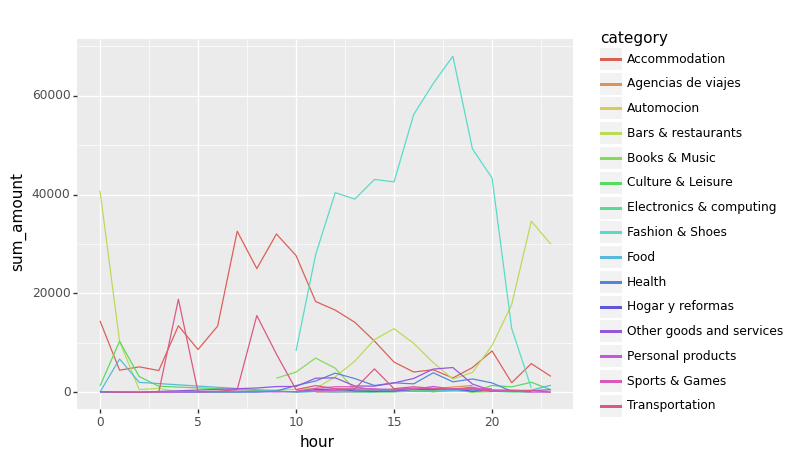

<ggplot: (8791513654459)>

In [211]:
ggplot(df3,aes(x="hour",y="sum_amount",color="category"))+geom_line()


In [212]:
custom_dict = {'Dawn': 0,'Morning': 1, 'Mid morning': 2, 'Afternoon': 3,'Evening': 4,'Night': 5,'Midight': 23}

In [213]:
df.sort_values(by=['daytime'], key=lambda x: x.map(custom_dict))

Unnamed: 0  amount                  category customer_country  \
6488         6489   16.50        Bars & restaurants               NO   
6390         6391  226.47             Accommodation               US   
775           776   15.69        Bars & restaurants               GB   
6391         6392   52.00             Accommodation               NL   
6392         6393   18.00        Bars & restaurants               IE   
...           ...     ...                       ...              ...   
10550       10551  218.86        Bars & restaurants               IL   
10622       10623   87.10        Bars & restaurants               US   
10764       10765  192.65  Other goods and services               NL   
10765       10766  200.00        Bars & restaurants               IT   
10790       10791   48.25        Bars & restaurants               US   

        daytime  hour            tx_date_proc    weekday       Date_new   \
6488       Dawn     0  2012-03-02 00:22:24+00  friday     02.03.12 00:22   
6390       Dawn     1  2012-03-01 01:25:56+00  thursday   01.03.12 01:25   
775        Dawn     0  2012-03-01 00:43:09+00  thursday   01.03.12 00:43   
6391       Dawn     1  2012-03-01 01:35:33+00  thursday   01.03.12 01:35   
6392       Dawn     2  2012-03-01 02:31:27+00  thursday   01.03.12 02:31   
...         ...   ...                     ...        ...             ...   
10550  Midnight    23  2012-03-01 23:55:38+00  thursday   01.03.12 23:55   
10622  Midnight    23  2012-03-02 23:41:52+00  friday     02.03.12 23:41   
10764  Midnight    23  2012-03-01 23:23:01+00  thursday   01.03.12 23:23   
10765  Midnight    23  2012-03-01 23:48:00+00  thursday   01.03.12 23:48   
10790  Midnight    23  2012-03-02 23:01:19+00  friday     02.03.12 23:01   

      numericcode  ...        sub_region    GDP_USD_2012  \
6488          578  ...   Northern Europe    509506317147   
6390          840  ...  Northern America  16253972230000   
775           826  ...   Northern Europe   2719158341006   
6391          528  ...    Western Europe    838923319920   
6392          372  ...   Northern Europe    225496810957   
...           ...  ...               ...             ...   
10550         376  ...      Western Asia    258417104164   
10622         840  ...  Northern America  16253972230000   
10764         528  ...    Western Europe    838923319920   
10765         380  ...   Southern Europe   2086957656822   
10790         840  ...  Northern America  16253972230000   

      GDP per capita (constant 2015 US$) GDP, PPP (current international $)  \
6488                               73179                       3.279877e+11   
6390                               54213                       1.625397e+13   
775                                43100                       2.453352e+12   
6391                               44243                       7.920423e+11   
6392                               46001                       2.132411e+11   
...                                  ...                                ...   
10550                              33995                       2.519206e+11   
10622                              54213                       1.625397e+13   
10764                              44243                       7.920423e+11   
10765                              31185                       2.172384e+12   
10790                              54213                       1.625397e+13   

       GDP growth (annual %)  Income_classification PPP_2012  \
6488                 2.703109           High income     9.04   
6390                 2.280688           High income     1.00   
775                  1.469888           High income     0.70   
6391                -1.030354           High income     0.82   
6392                -0.052355           High income     0.82   
...                       ...                   ...      ...   
10550                2.822996           High income     3.96   
10622                2.280688           High in

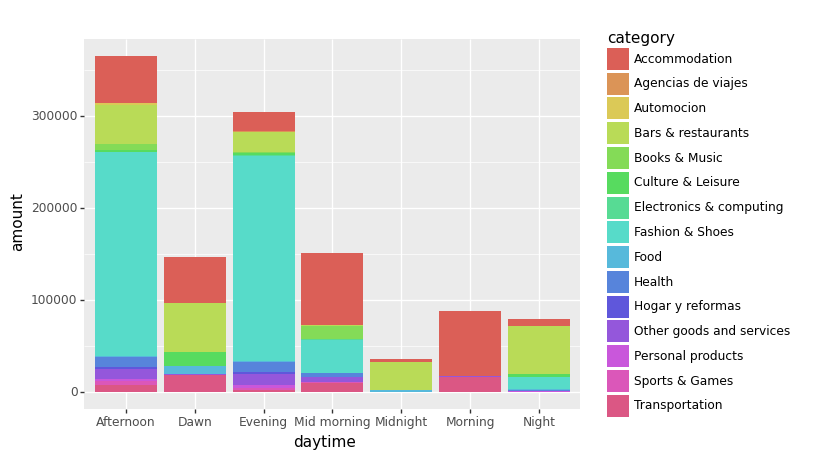

<ggplot: (8791514820407)>

In [214]:
import plotnine
plotnine.ggplot(df, plotnine.aes(x='daytime', y='amount')) + \
    plotnine.geom_col(plotnine.aes(fill = 'category')) 
#+ \
    #plotnine.stat_summary(plotnine.aes(label ='stat(y)'), fun_y = sum, geom = "text")
#plotnine.stat_summary(plotnine.aes(label ='stat(y)'), fun_y = sum, geom = "text")

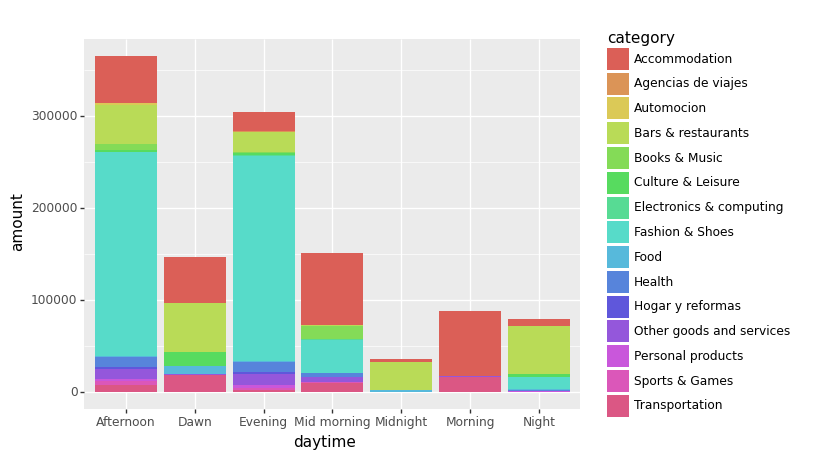

<ggplot: (8791483684259)>

In [215]:
plotnine.ggplot(df, plotnine.aes(x='daytime', y='amount')) + \
    plotnine.geom_col(plotnine.aes(fill = 'category')) 

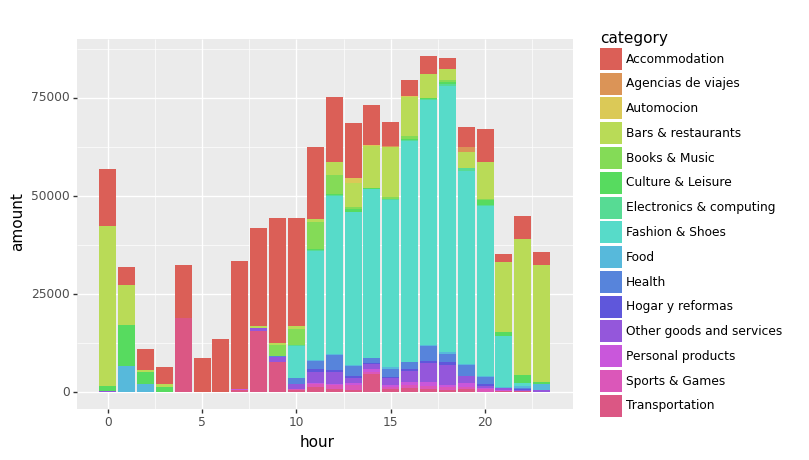

<ggplot: (8791470379918)>

In [216]:
import plotnine
plotnine.ggplot(df, plotnine.aes(x='hour', y='amount')) + \
    plotnine.geom_col(plotnine.aes(fill = 'category')) 

In [217]:
sum_amount=df.groupby('category').amount.sum()

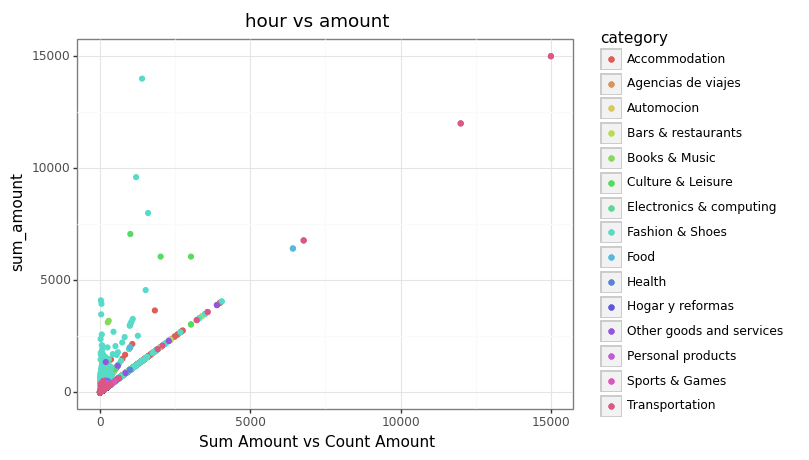

<ggplot: (8791396123420)>

In [218]:
(ggplot(df)+ aes(x="amount",y="amount", color='category')
 + geom_point()
 + plotnine.stat_summary(plotnine.aes(label ='stat(y)'), fun_y = sum, geom = "point")
 + labs(title='hour vs amount', x='Sum Amount vs Count Amount', y='sum_amount')
 + theme_bw()
)



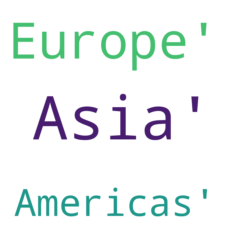

In [219]:
# Libraries

# Create a list of word
text=df['region'].values

# Create the wordcloud object
wordcloud = WordCloud(width=1000, height=1000, margin=0,background_color="white").generate(str(text))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

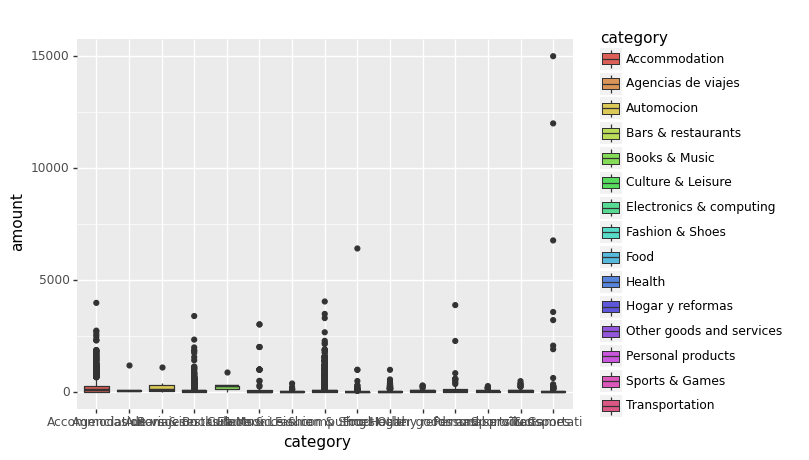

<ggplot: (8791530757937)>

In [220]:
ggplot(df,aes(x ="category", y ="amount"))+ geom_boxplot(aes(fill = "category")) 
#+ geom_jitter(alpha = 0.4)

In [222]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

# Get the categories, sorted alphabetically
species = sorted(df["Income_classification"].unique())

# y_data is a list of length 3 containing the bill_length_mm values for each specie 
y_data = [df[df["Income_classification"] == specie]["category"].values for specie in species]

# Create jittered version of "x" (which is only 0, 1, and 2)
# More about this in the bonus track!
jitter = 0.04
x_data = [np.array([i] * len(d)) for i, d in enumerate(y_data)]
x_jittered = [x + st.t(df=6, scale=jitter).rvs(len(x)) for x in x_data]

In [223]:
# Colors
BG_WHITE = "#fbf9f4"
GREY_LIGHT = "#b4aea9"
GREY50 = "#7F7F7F"
BLUE_DARK = "#1B2838"
BLUE = "#2a475e"
BLACK = "#282724"
GREY_DARK = "#747473"
RED_DARK = "#850e00"

# Colors taken from Dark2 palette in RColorBrewer R library
COLOR_SCALE = ["#1B9E77", "#D95F02", "#7570B3","#2a475e"]

# Horizontal positions for the violins. 
# They are arbitrary numbers. They could have been [-1, 0, 1] for example.
POSITIONS = [0, 1, 2, 3]

# Horizontal lines
HLINES = [40, 50, 60, 70]

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

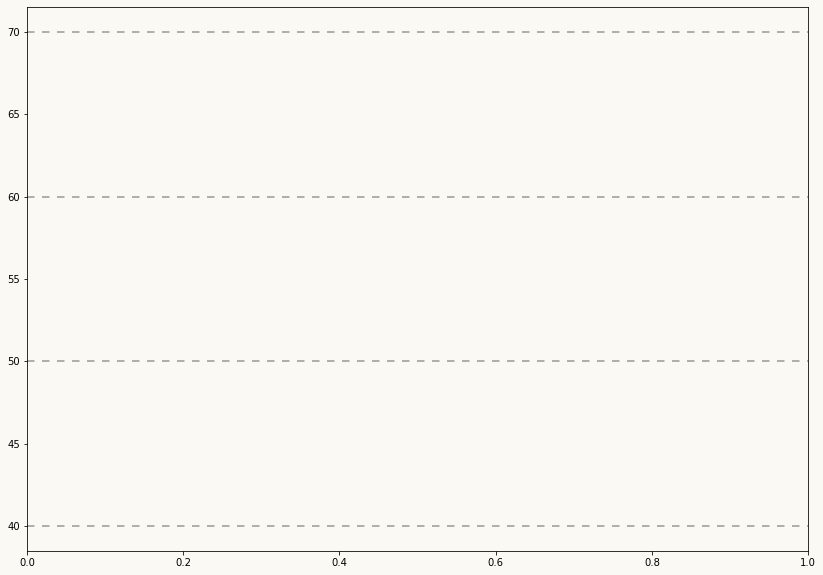

In [224]:
fig, ax = plt.subplots(figsize= (14, 10))

# Some layout stuff ----------------------------------------------
# Background color
fig.patch.set_facecolor(BG_WHITE)
ax.set_facecolor(BG_WHITE)

# Horizontal lines that are used as scale reference
for h in HLINES:
    ax.axhline(h, color=GREY50, ls=(0, (5, 5)), alpha=0.8, zorder=0)

# Add violins ----------------------------------------------------
# bw_method="silverman" means the bandwidth of the kernel density
# estimator is computed via Silverman's rule of thumb. 
# More on this in the bonus track ;)

# The output is stored in 'violins', used to customize their appearence
violins = ax.violinplot(
    y_data, 
    positions=POSITIONS,
    widths=0.45,
    bw_method="silverman",
    showmeans=False, 
    showmedians=False,
    showextrema=False
)

# Customize violins (remove fill, customize line, etc.)
for pc in violins["bodies"]:
    pc.set_facecolor("none")
    pc.set_edgecolor(BLACK)
    pc.set_linewidth(1.4)
    pc.set_alpha(1)
    

# Add boxplots ---------------------------------------------------
# Note that properties about the median and the box are passed
# as dictionaries.

medianprops = dict(
    linewidth=4, 
    color=GREY_DARK,
    solid_capstyle="butt"
)
boxprops = dict(
    linewidth=2, 
    color=GREY_DARK
)

ax.boxplot(
    y_data,
    positions=POSITIONS, 
    showfliers = False, # Do not show the outliers beyond the caps.
    showcaps = False,   # Do not show the caps
    medianprops = medianprops,
    whiskerprops = boxprops,
    boxprops = boxprops
)

# Add jittered dots ----------------------------------------------
for x, y, color in zip(x_jittered, y_data, COLOR_SCALE):
    ax.scatter(x, y, s = 100, color=color, alpha=0.4)

In [229]:
import numpy as np
ggplot(df)+ aes(x="hour",y="amount", color='category')+\
geom_point()+\
stat_summary(
    mapping=aes(x="hour", y="amount"),
    fun_y=sum
)

PlotnineError: 'geom_pointrange requires the following missing aesthetics: ymax, ymin'

In [230]:
plotnine.ggplot(df, plotnine.aes(x="hour",y="amount", color='category'))+ \
plotnine.geom_point()+ \
plotnine.stat_summary(plotnine.aes(fun_y = sum, geom = "text"))

PlotnineError: "Do not know how to deal with aesthetic 'fun_y'"

In [231]:
#labs(title='hour vs amount', x='Engine Displacement, in Litres', y='Highway Miles per Gallon'))

In [232]:
import plotly.express as px
fig = px.treemap(df, path=[px.Constant("all"), 'Region', 'customer_country'])
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

ValueError: Value of 'path_1' is not the name of a column in 'data_frame'. Expected one of ['Unnamed: 0', 'amount', 'category', 'customer_country', 'daytime', 'hour', 'tx_date_proc', 'weekday', 'Date_new ', 'numericcode', 'latitude(average)', 'longitude(average)', 'country_name', 'alpha-3', 'country_code', 'iso_3166-2', 'region', 'sub_region', 'GDP_USD_2012', 'GDP per capita (constant 2015 US$)', 'GDP, PPP (current international $)', 'GDP growth (annual %) ', 'Income_classification', 'PPP_2012', 'Gross domestic income (constant LCU)', 'Adjusted net national income per capita (constant 2015 US$)', 'GNI per capita, PPP (current international $)'] but received: Region

In [233]:
import plotly.express as px
fig = px.treemap(df, path=[px.Constant("all"), 'daytime', 'hour'])
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [234]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in

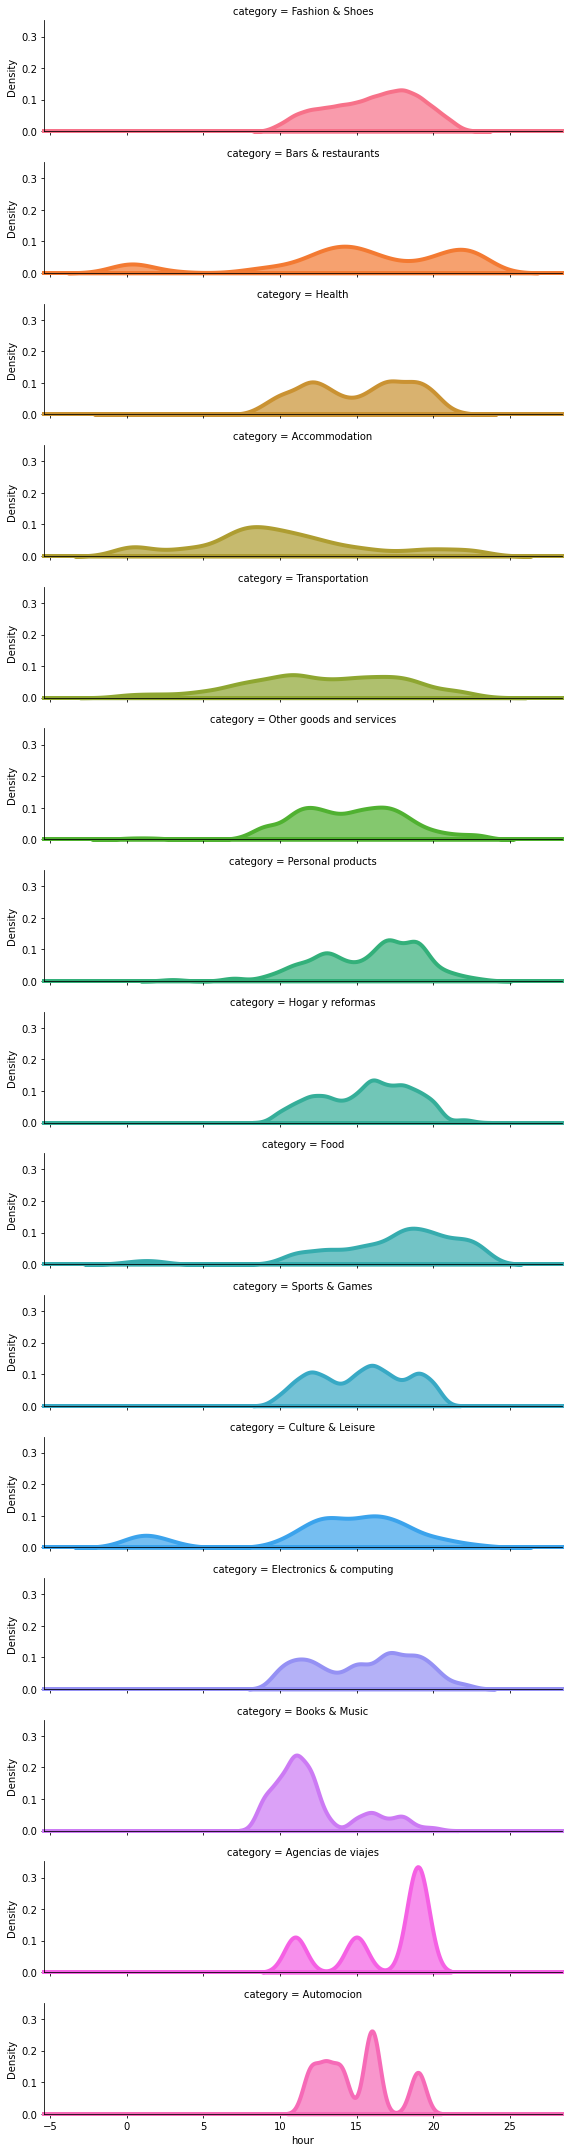

In [235]:
# Use FacetGrid to create the facet with one column
ridge_plot = sns.FacetGrid(df, row="category", hue="category", aspect=4, height=2.00)
# Use map function to make density plot in each element of the grid.
ridge_plot.map(sns.kdeplot, "hour", clip_on=False, shade=True, alpha=0.7, lw=4, bw=.2)
ridge_plot.map(plt.axhline, y=0, lw=4, clip_on=False)
ridge_plot.savefig("Ridgeline_plot_Seaborn_first_step.png")

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1210: UserWarning:

No contour levels were found within the data range.



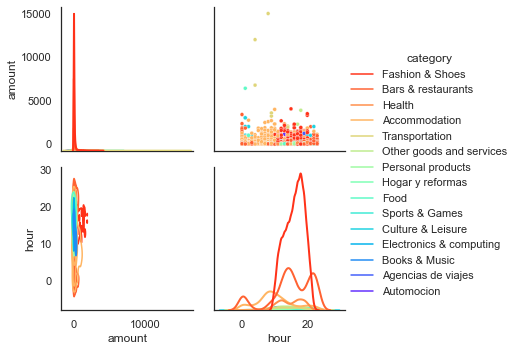

In [236]:
sns.set_theme(style="white")

g = sns.PairGrid(df, vars = ['amount','hour'],hue='category', diag_sharey=False, palette = 'rainbow_r')
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot,warn_singular=False)
g.map_diag(sns.kdeplot, lw=2,warn_singular=False)
g.add_legend()

In [237]:
label_names = ['category']
df['avg_amount'] = df[['amount','category']].mean()
temp_df = df[['hour', 'amount', 'avg_amount']].copy()
temp_df['category'] = [label_names[i-1] for i in df['category']]

fig = px.scatter_3d(
    temp_df, 
    x='hour', 
    y='amount', 
    z='avg_amount',
    color='category',
    title='Hillshade Features in 3-D',
    opacity=0.2, 
    color_discrete_sequence=px.colors.qualitative.Plotly[:7],
    width=1000, height=800
    )

fig.show()

/var/folders/ks/5bc1x9p158vgc4774v7r2tq40000gn/T/ipykernel_65253/1984551183.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



TypeError: unsupported operand type(s) for -: 'str' and 'int'

In [ ]:
#soil_dummies = df.loc[:,df.columns.str.startswith('category')]
#soil = soil_dummies.idxmax(axis=1)
#soil.name = 'category'
#df['category'] 
plt.figure(figsize=(12,5))
sns.countplot(x='category',data=df,palette='rainbow',order = df['category'].value_counts().index);
plt.xticks(rotation=90);

In [ ]:
pip install plydata

In [ ]:
import pandas as pd
import pandas.api.types as pdtypes
import numpy as np

from plotnine import *
from plydata import *

In [238]:
segment_data = (
    point_data
    >> group_by('country')
    >> summarize(min='min(sm_use_percent)', max='max(sm_use_percent)')
    >> define(gap='max-min')
    >> arrange('-gap')
    # Format the floating point data that will be plotted into strings
    >> define(
        min_str='format_sequence(min, "{:.0f}")',
        max_str='format_sequence(max, "{:.0f}")',
        gap_str='format_sequence(gap, "{:.0f}")',
    )
)

NameError: name 'point_data' is not defined

In [240]:
ggplot(w, aes(x=reorder(factor(area),tfr,FUN="median"), y=tfr)) 
p + geom_violin() + geom_boxplot(width=.1, outlier.size=0) + scale_y_continuous(breaks=c(1,2,3,4,5,6,7)) + theme(axis.title.y=element_text(angle=0,size=12),
axis.text.y=element_text(color="black", size=12), axis.text.x=element_text(color="black", size=12), legend.position="none") +
labs(title="Country TFRs: Density Distribution, Median and IQR by Area, 2012", x="", y="TFR")

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (2006658667.py, line 2)